# Explore here

In [13]:
# Your code here


# # Librerías básicas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y división de datos
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optimización
from sklearn.model_selection import GridSearchCV

# Guardar el modelo
import joblib


ANALISIS DE DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
Variables numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


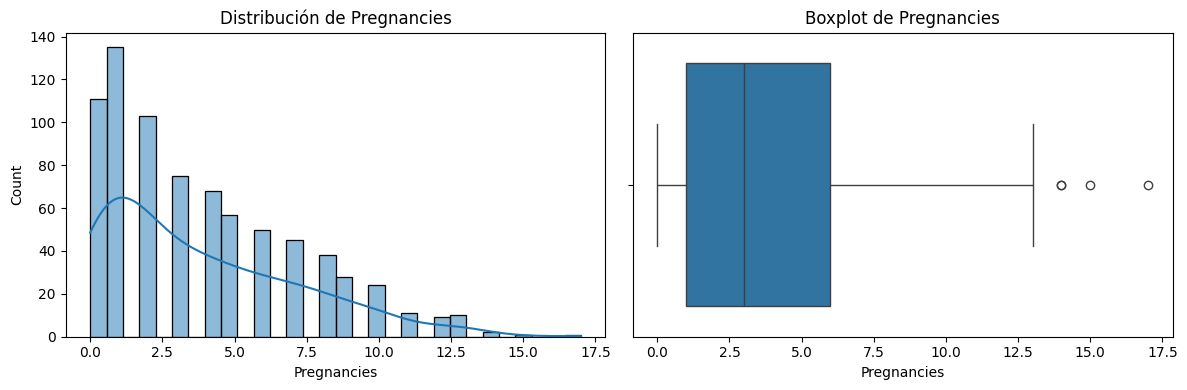

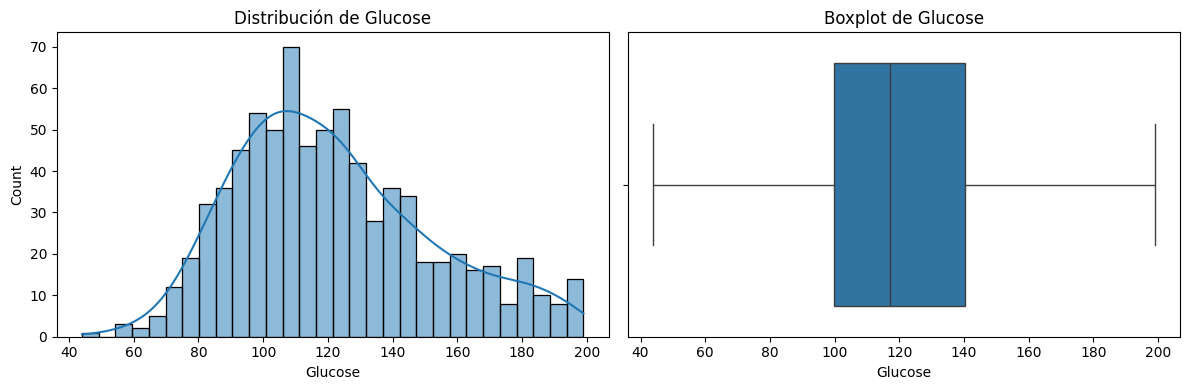

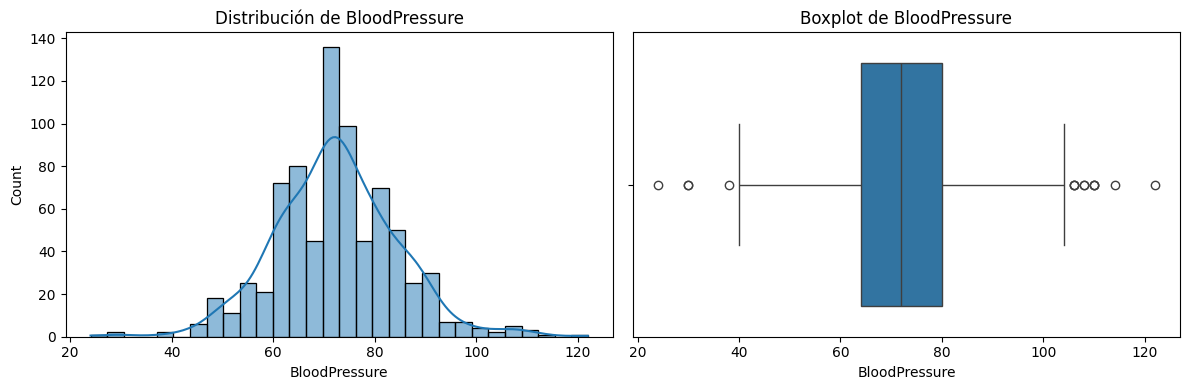

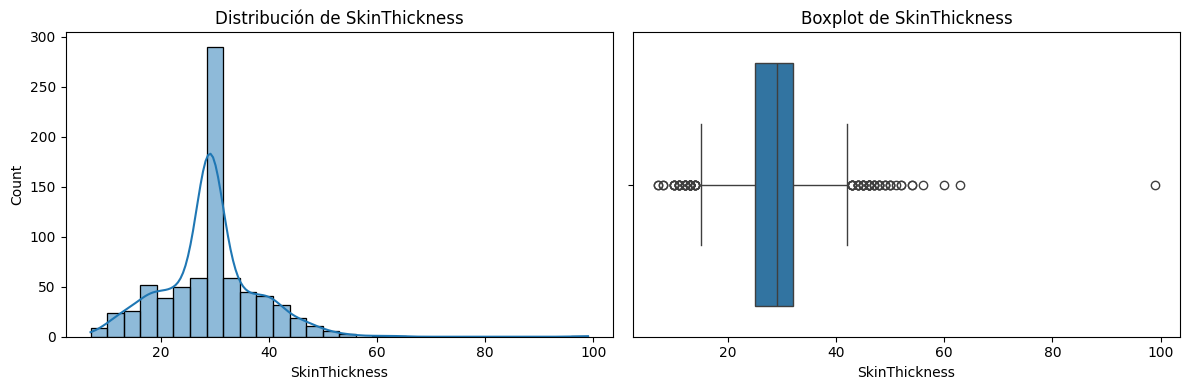

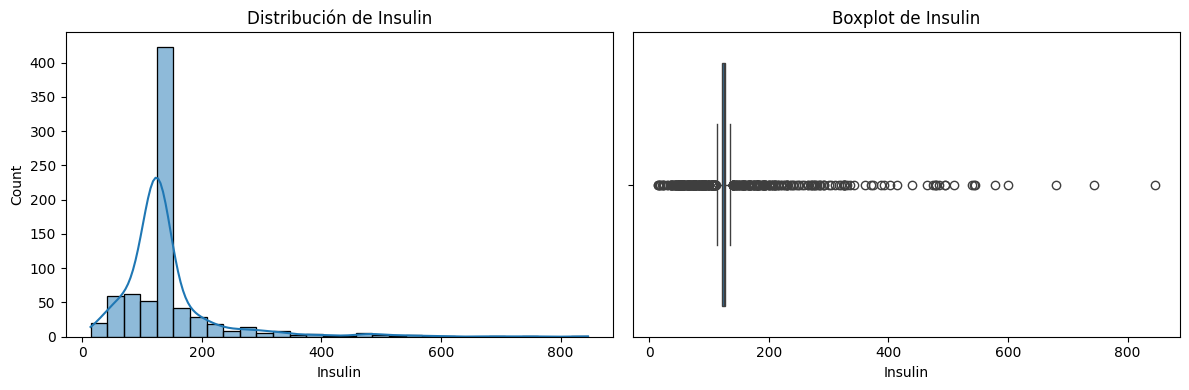

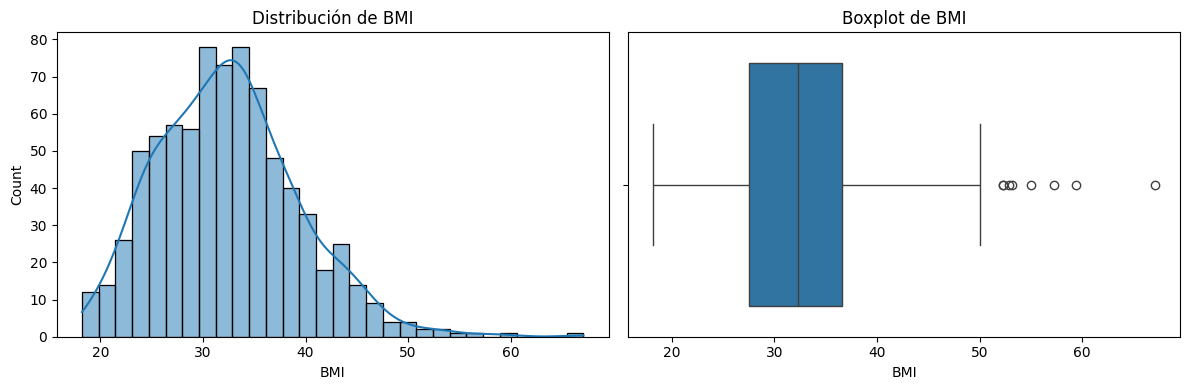

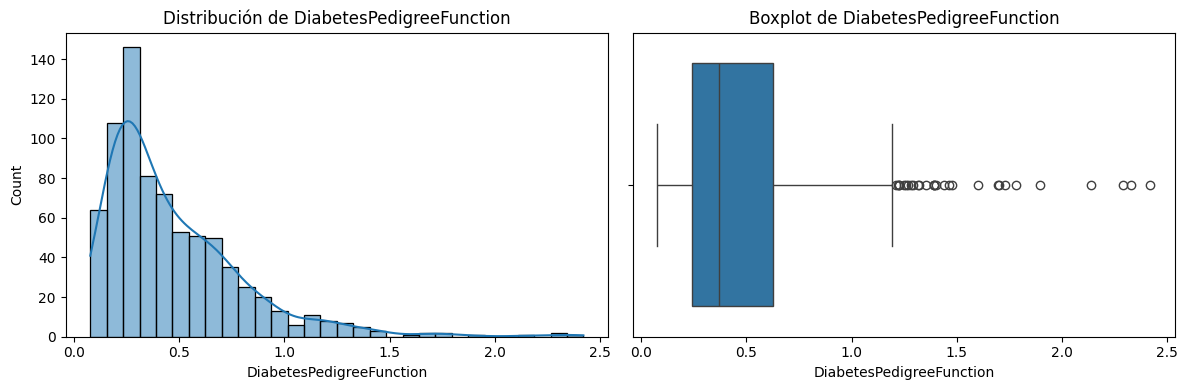

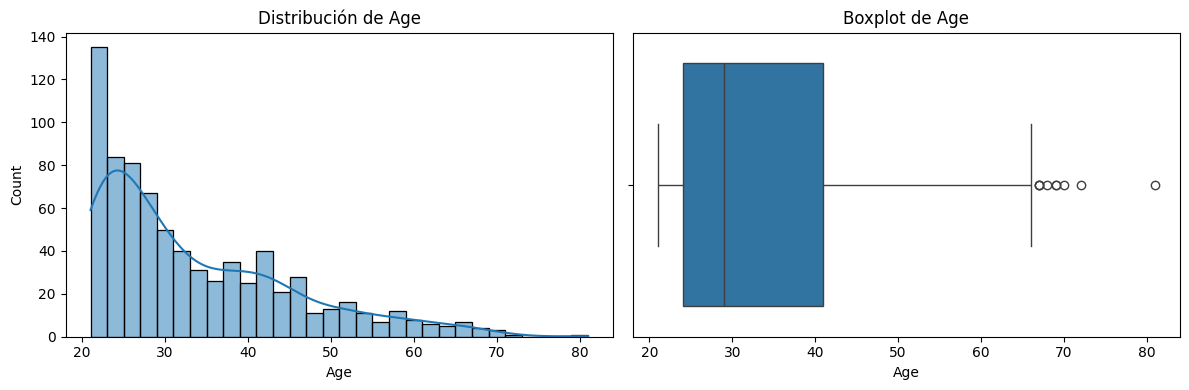

In [14]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head()


cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zeros] == 0).sum()

df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()

# Imputación con la mediana (opcionalmente se puede usar KNN o media)
df.fillna(df.median(), inplace=True)
print(df.info())


# Clasificamos variables
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", numericas)

# Outcome será tratada como categórica
categoricas = ['Outcome']
numericas.remove('Outcome')



# Histograma y boxplot por variable
for col in numericas:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], bins=30, kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


    

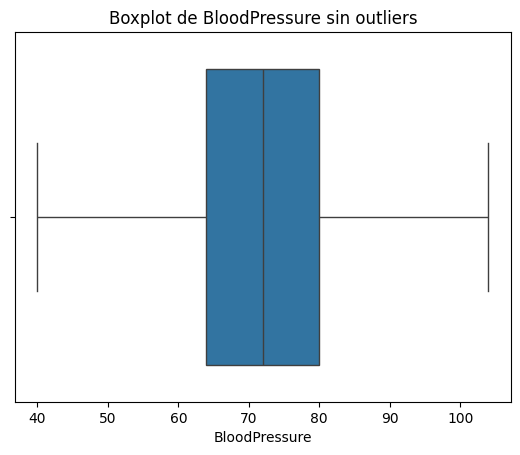

In [15]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos el DataFrame
df = df[(df['BloodPressure'] >= lower_limit) & (df['BloodPressure'] <= upper_limit)]

sns.boxplot(x=df['BloodPressure'])
plt.title("Boxplot de BloodPressure sin outliers")
plt.show()

In [16]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Entrenamos AD , RF Y XGBOOSTING

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo base
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = gb_model.predict(X_test)
print("Accuracy (modelo base):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy (modelo base): 0.7577092511013216
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.68      0.57      0.62        79

    accuracy                           0.76       227
   macro avg       0.74      0.71      0.72       227
weighted avg       0.75      0.76      0.75       227



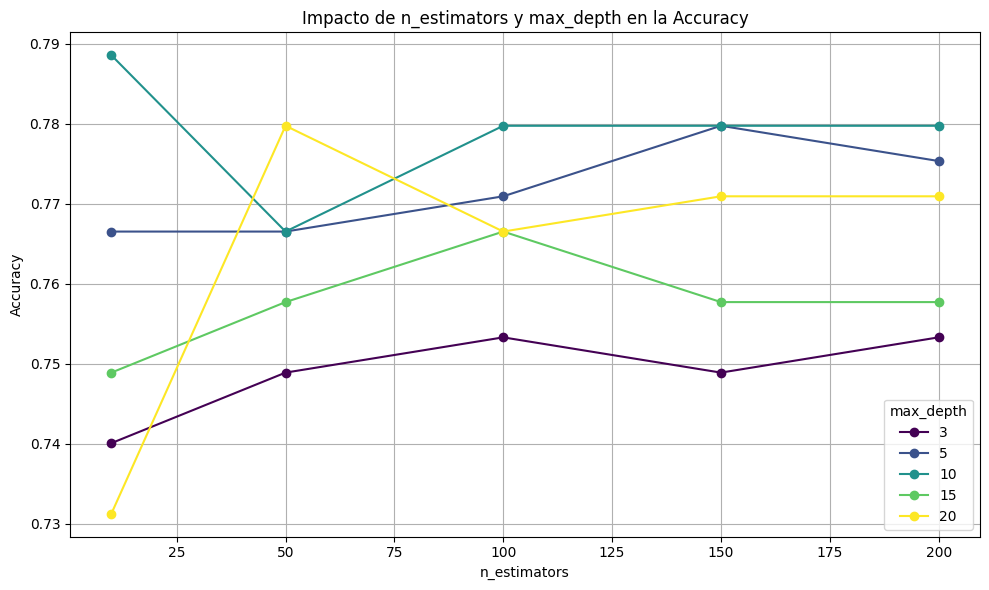

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

estimators_range = [10, 50, 100, 150, 200]
depth_range = [3, 5, 10, 15, 20]
scores = []

for n in estimators_range:
    for d in depth_range:
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append((n, d, acc))

# Visualización
import pandas as pd
results_df = pd.DataFrame(scores, columns=["n_estimators", "max_depth", "accuracy"])

pivot_table = results_df.pivot(index="n_estimators", columns="max_depth", values="accuracy")
pivot_table.plot(kind="line", marker="o", figsize=(10,6), cmap='viridis')
plt.title("Impacto de n_estimators y max_depth en la Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.grid(True)
plt.legend(title="max_depth")
plt.tight_layout()
plt.show()


Segun el grafico los mejores parametros serian:
GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)

Vamos a entrenarlo y a guardarlo


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# 1. Entrenar modelo con mejores hiperparámetros
best_gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
best_gb_model.fit(X_train, y_train)

# 2. Predicción y evaluación
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy del modelo Gradient Boosting (n=150, lr=0.1): {accuracy_gb:.4f}")

import os
import joblib

# Crear carpeta 
os.makedirs("models", exist_ok=True)

# Guardar modelo con extensión .pkl
joblib.dump(best_gb_model, 'models/boosting_model.pkl')
print("✅ Modelo Gradient Boosting guardado como 'models/boosting_model.pkl'")

# 3. Guardar el modelo entrenado
joblib.dump(best_gb_model, 'models/boosting')
print("Modelo Gradient Boosting guardado como 'models/boosting.pkl'")


Accuracy del modelo Gradient Boosting (n=150, lr=0.1): 0.7533
✅ Modelo Gradient Boosting guardado como 'models/boosting_model.pkl'
Modelo Gradient Boosting guardado como 'models/boosting.pkl'
